In [1]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 106.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 134.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 116.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 38.9 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install xgboost==1.7.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 11.6 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install lightgbm==3.3.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 113.6 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install pyjanitor==0.23.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 975.8/975.8 KB 103.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 99.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.5
    Not uninstalling pandas at /shared-libs/python3.9/py/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'pandas'. No files were found to uninstall.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip uninstall pyjanitor --yes

Found existing installation: pyjanitor 0.23.1
Uninstalling pyjanitor-0.23.1:
  Successfully uninstalled pyjanitor-0.23.1


In [6]:
import warnings, gc
import numpy as np 
import pandas as pd
import matplotlib.colors
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from datetime import datetime, timedelta
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error,mean_absolute_error
from lightgbm import LGBMRegressor
from decimal import ROUND_HALF_UP, Decimal
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa import SARIMAX
#import statsmodels.tsa
from statsmodels.tsa.arima.model import ARIMA#, SARIMAX
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from sklearn.inspection import permutation_importance
import math
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff

import xgboost as xgb

In [7]:
BBVA_path = '/work/BBVAC1_2023-02-05_2023-03-05.csv'
BCP_path = '/work/CREDITC1_2023-02-05_2023-03-05.csv'

In [8]:
BBVA_df = pd.read_csv(BBVA_path, sep= ';',delimiter=None  )
BCP_df = pd.read_csv(BCP_path, sep= ';' , delimiter = None)

In [9]:
print(BBVA_df.nunique()), print(BBVA_df)

Fecha de cotización          2531
Apertura                      469
Cierre                        460
Máximo                        451
Mínimo                        470
Promedio                     2253
Cantidad negociada           2449
Monto negociado (S/)         2483
Fecha anterior               2435
Cierre anterior corregido     461
dtype: int64
     Fecha de cotización  Apertura  Cierre  Máximo  Mínimo  Promedio  \
0             02/03/2023      1.72    1.71    1.72    1.71  1.715045   
1             01/03/2023      1.73    1.72    1.73    1.72  1.721906   
2             28/02/2023      1.73    1.73    1.73    1.73  1.730031   
3             27/02/2023      1.73    1.73    1.73    1.73  1.726157   
4             24/02/2023      1.72    1.70    1.72    1.70  1.717036   
...                  ...       ...     ...     ...     ...       ...   
2526          12/02/2013      7.15    7.14    7.15    7.14  7.149741   
2527          11/02/2013      7.15    7.15    7.15    7.15  7.150000   

(None, None)

In [10]:
BBVA_df.dtypes

Fecha de cotización           object
Apertura                     float64
Cierre                       float64
Máximo                       float64
Mínimo                       float64
Promedio                     float64
Cantidad negociada           float64
Monto negociado (S/)         float64
Fecha anterior                object
Cierre anterior corregido    float64
dtype: object

In [11]:
BBVA_df.isnull().sum()

Fecha de cotización           0
Apertura                     95
Cierre                       95
Máximo                       95
Mínimo                       95
Promedio                     47
Cantidad negociada           45
Monto negociado (S/)         47
Fecha anterior                2
Cierre anterior corregido     0
dtype: int64

In [12]:
BCP_df.isnull().sum()

Fecha de cotización            0
Apertura                     340
Cierre                       340
Máximo                       340
Mínimo                       340
Promedio                     190
Cantidad negociada           188
Monto negociado (S/)         190
Fecha anterior                 1
Cierre anterior corregido      0
dtype: int64

In [13]:
import datetime as dt

In [14]:
print(BBVA_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2531 entries, 0 to 2530
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fecha de cotización        2531 non-null   object 
 1   Apertura                   2436 non-null   float64
 2   Cierre                     2436 non-null   float64
 3   Máximo                     2436 non-null   float64
 4   Mínimo                     2436 non-null   float64
 5   Promedio                   2484 non-null   float64
 6   Cantidad negociada         2486 non-null   float64
 7   Monto negociado (S/)       2484 non-null   float64
 8   Fecha anterior             2529 non-null   object 
 9   Cierre anterior corregido  2531 non-null   float64
dtypes: float64(8), object(2)
memory usage: 197.9+ KB
None


In [15]:
BBVA_date = BBVA_df.index
BCP_date = BCP_df.index

BBVA_date.shape 
BCP_date.shape

(2531,)

In [16]:
BCP_date

RangeIndex(start=0, stop=2531, step=1)

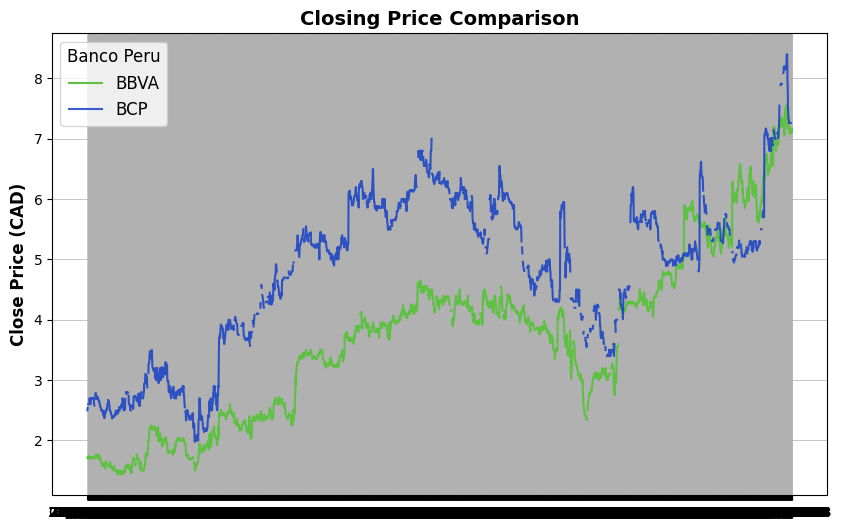

In [17]:
plt.figure(figsize=(10,6))
plt.grid(True, linewidth=0.5)

plt.plot(BBVA_df['Fecha de cotización'], BBVA_df['Cierre'], label='BBVA', c='#5FC144', alpha=1, linewidth=1.5)
plt.plot(BBVA_df['Fecha de cotización'], BCP_df['Cierre'], label='BCP', c='#1741C6', alpha=0.85, linewidth=1.5)



plt.ylabel('Close Price (CAD)', weight="bold", size=12)
plt.title('Closing Price Comparison', weight="bold", size=14)
plt.legend(fontsize="large", title="Banco Peru", title_fontsize=12)
plt.show()

In [18]:
df = BBVA_df.copy()
col = 'Cierre anterior corregido'
periods = [5,10,20,30,50]
for period in periods:
    df.loc[:,"MovingAvg_{}Day".format(period)] = df['Cierre'].rolling(window=period).mean().values

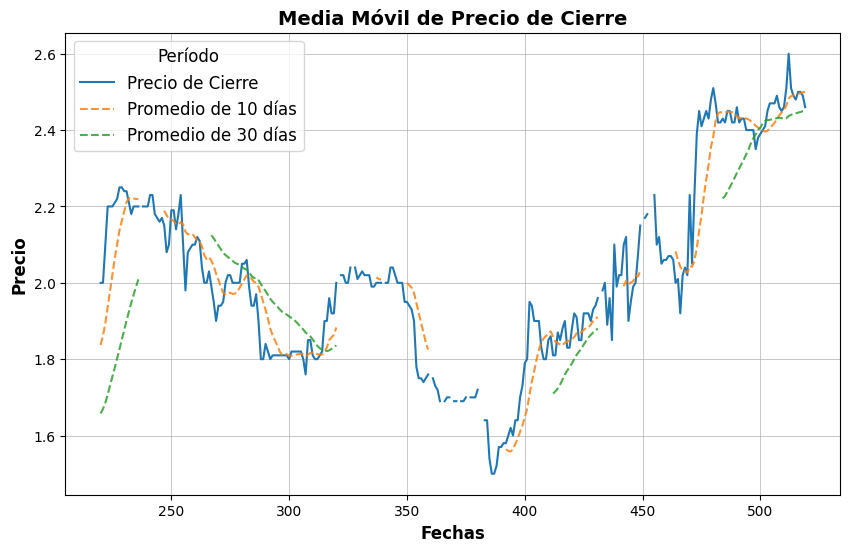

In [19]:
plt.figure(figsize=(10,6))
plt.grid(True, linewidth=0.5)

plt.plot(BBVA_date[220:520], df['Cierre'][220:520], label='Precio de Cierre', alpha=1, linewidth=1.5)
plt.plot(BBVA_date[220:520], df['MovingAvg_10Day'][220:520], label='Promedio de 10 días', linestyle='--', alpha=0.85, linewidth=1.5)
plt.plot(BBVA_date[220:520], df['MovingAvg_30Day'][220:520], label='Promedio de 30 días', linestyle='--', alpha=0.85, linewidth=1.5)

plt.xlabel('Fechas', weight="bold", size=12)
plt.ylabel('Precio', weight="bold", size=12)
plt.title('Media Móvil de Precio de Cierre', weight="bold", size=14)
plt.legend(fontsize="large", title="Período", title_fontsize=12)
plt.show()

In [20]:
print(BBVA_date)

RangeIndex(start=0, stop=2531, step=1)


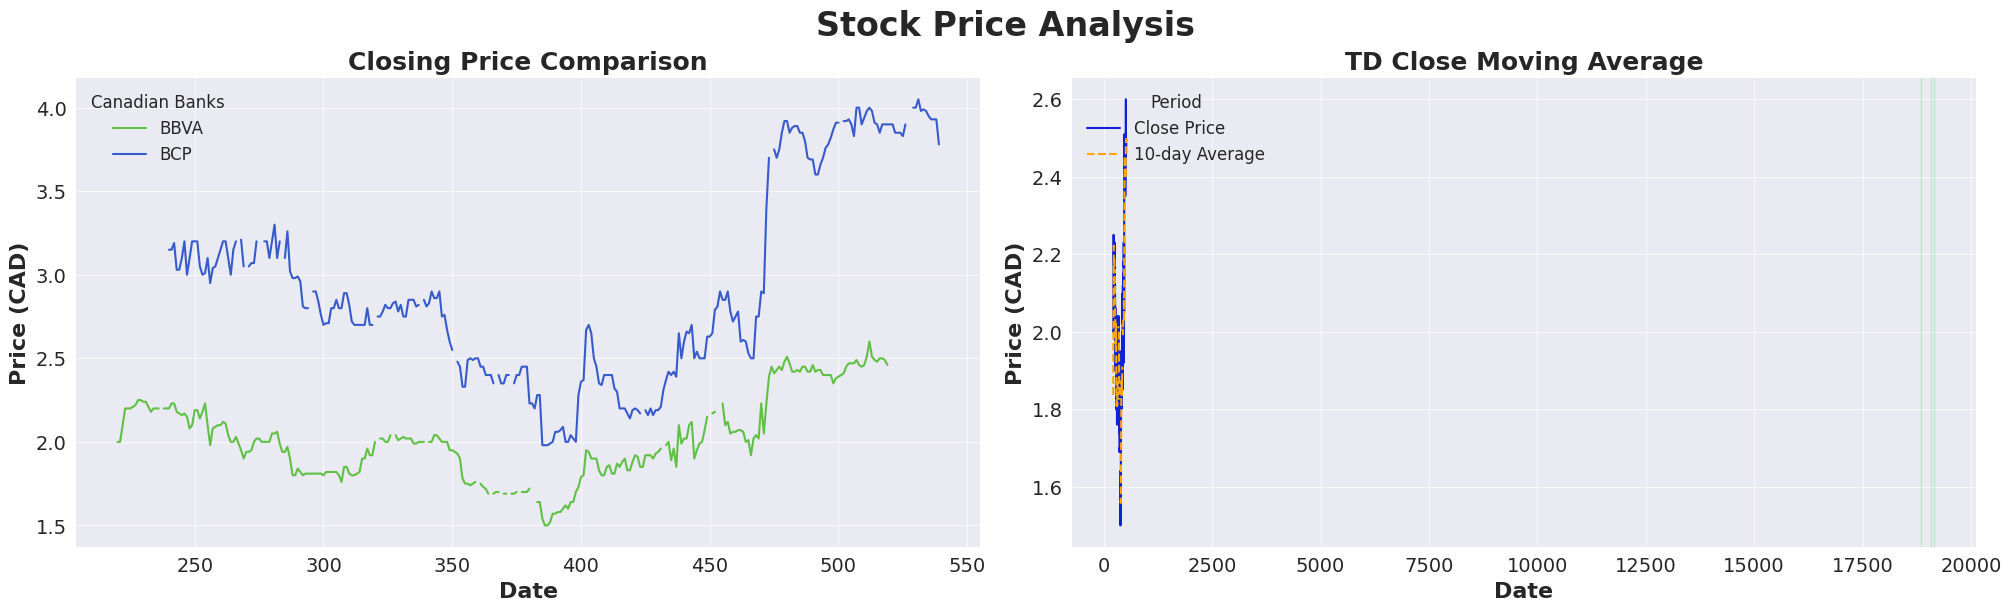

In [21]:
plt.style.use('seaborn')
fig, axs = plt.subplots(1,2,figsize=(20,6), constrained_layout=True)

fig.suptitle('Stock Price Analysis', weight="bold", size=24)
axs[0].grid(True, linewidth=0.5)

axs[0].plot(BBVA_date[220:520], BBVA_df['Cierre'][220:520], label='BBVA', c='#5FC144', alpha=1, linewidth=1.5)
axs[0].plot(BCP_date[240:540], BCP_df['Cierre'][240:540], label='BCP', c='#1741C6', alpha=0.85, linewidth=1.5)


axs[0].set_xlabel('Date', weight="bold", size=16)
axs[0].set_ylabel('Price (CAD)', weight="bold", size=16)
axs[0].set_title('Closing Price Comparison', weight="bold", size=18)
axs[0].legend(fontsize="large", title="Canadian Banks", title_fontsize=12)
for label in (axs[0].get_xticklabels() + axs[0].get_yticklabels()):
  label.set_fontsize(14)

axs[1].grid(True, linewidth=0.5)

axs[1].plot(BBVA_date[220:520], df['Cierre'][220:520], label='Close Price', color='#0D22D6', alpha=1, linewidth=1.5)
axs[1].plot(BCP_date[220:520], df['MovingAvg_10Day'][220:520], label='10-day Average', linestyle='--', color='orange', alpha=1.0, linewidth=1.5)


axs[1].set_xlabel('Date', weight="bold", size=16)
axs[1].set_ylabel('Price (CAD)', weight="bold", size=16)
axs[1].set_title('TD Close Moving Average', weight="bold", size=18)
axs[1].legend(fontsize="large", title="Period", title_fontsize=12, loc='upper left')
axs[1].axvspan(*mdates.datestr2num(['8/5/2021','8/30/2021']), color='#0DD622', alpha=0.15)
axs[1].axvspan(*mdates.datestr2num(['3/20/2022','4/15/2022']), color='#0DD622', alpha=0.15)
axs[1].axvspan(*mdates.datestr2num(['5/25/2022','6/20/2022']), color='#0DD622', alpha=0.15)

for label in (axs[1].get_xticklabels() + axs[1].get_yticklabels()):
  label.set_fontsize(14)

plt.savefig('stock_analysis.png')
plt.show()

In [22]:
tts = TimeSeriesSplit(n_splits=5, test_size=365*1, gap=0)

In [23]:
BBVA_df.dropna(inplace= True)

In [24]:
y = BBVA_df.reset_index()[['Fecha de cotización','Cierre']][2045:2545]

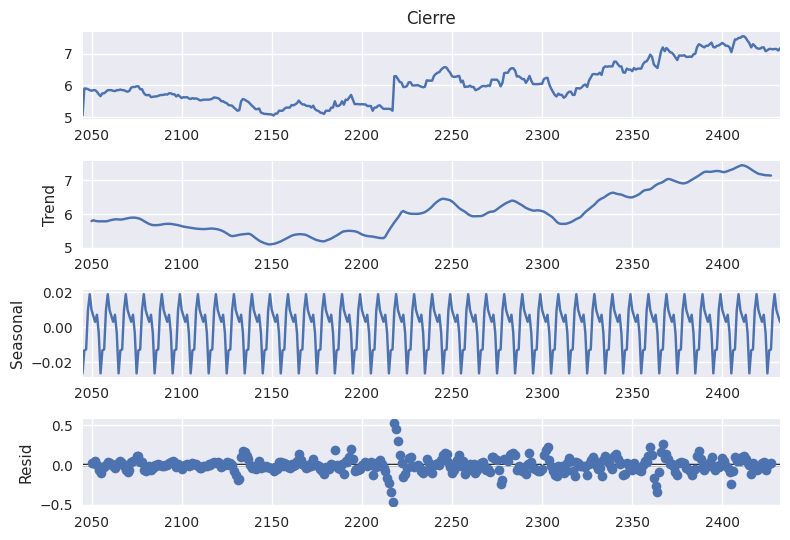

In [25]:
decomposition = sm.tsa.seasonal_decompose(y['Cierre'], model='additive', period=10)
fig = decomposition.plot()
plt.show()

In [26]:
BBVA_df_subset_s = BBVA_df[45:245].copy()
BBVA_df_subset_s 

,Fecha de cotización,Apertura,Cierre,Máximo,Mínimo,Promedio,Cantidad negociada,Monto negociado (S/),Fecha anterior,Cierre anterior corregido
47,27/12/2022,1.70,1.70,1.70,1.69,1.698362,143218.0,243236.06,26/12/2022,1.65
48,26/12/2022,1.65,1.65,1.65,1.65,1.653359,6744.0,11150.25,23/12/2022,1.65
49,23/12/2022,1.65,1.65,1.65,1.65,1.649707,188266.0,310583.70,22/12/2022,1.65
50,22/12/2022,1.63,1.65,1.65,1.63,1.637865,26506.0,43413.26,21/12/2022,1.63
51,21/12/2022,1.63,1.63,1.63,1.60,1.629234,335566.0,546715.38,20/12/2022,1.60
...,...,...,...,...,...,...,...,...,...,...
253,01/03/2022,2.22,2.18,2.22,2.18,2.197146,18589.0,40842.74,28/02/2022,2.23
254,28/02/2022,2.10,2.23,2.23,2.10,2.214537,955937.0,2116958.27,25/02/2022,2.10
255,25/02/2022,2.05,2.10,2.10,2.05,2.076553,2115155.0,4392231.15,24/02/2022,1.98
256,24/02/2022,2.00,1.98,2.00,1.96,1.972684,45038.0,88845.72,23/02/2022,2.08


In [27]:
train_data_s, test_data_s = BBVA_df_subset_s[0:int(len(BBVA_df_subset_s)*0.8)], BBVA_df_subset_s[int(len(BBVA_df_subset_s)*0.8):]

In [28]:
smodel = auto_arima(BBVA_df_subset_s['Cierre'], start_p=1, start_q=1,
                    test='adf',
                    max_p=3, max_q=3,
                    m=30, #30 days, frequency
                    start_P=0, seasonal=True,
                    d=None, D=1, trace=True,
                    error_action='ignore',
                    suppress_warnings=True,
                    stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[30]             : AIC=inf, Time=20.79 sec
 ARIMA(0,1,0)(0,1,0)[30]             : AIC=-473.522, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[30]             : AIC=-525.233, Time=14.44 sec
 ARIMA(0,1,1)(0,1,1)[30]             : AIC=inf, Time=30.20 sec
 ARIMA(1,1,0)(0,1,0)[30]             : AIC=-472.148, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[30]             : AIC=-532.144, Time=25.66 sec
 ARIMA(1,1,0)(2,1,1)[30]             : AIC=inf, Time=47.81 sec
 ARIMA(1,1,0)(1,1,1)[30]             : AIC=inf, Time=23.09 sec
 ARIMA(0,1,0)(2,1,0)[30]             : AIC=-534.121, Time=17.40 sec
 ARIMA(0,1,0)(1,1,0)[30]             : AIC=-527.228, Time=3.50 sec
 ARIMA(0,1,0)(2,1,1)[30]             : AIC=inf, Time=32.00 sec
 ARIMA(0,1,0)(1,1,1)[30]             : AIC=inf, Time=15.10 sec
 ARIMA(0,1,1)(2,1,0)[30]             : AIC=-532.165, Time=27.10 sec
 ARIMA(1,1,1)(2,1,0)[30]             : AIC=-530.160, Time=27.89 sec
 ARIMA(0,1,0)(2,1,0)[30] intercept   :

In [29]:
n_periods = 30*3 # for the next 3 months
s_fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True) # forecast on a daily basic
index_of_fc = pd.date_range(BBVA_df_subset_s.index[-1], periods = n_periods, freq='D')

# make series for plotting purpose
fitted_series = pd.Series(s_fitted.values, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

In [30]:
n_periods = 30*3 # for the next 3 months
s_fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True) # forecast on a daily basic
index_of_fc = pd.date_range(BBVA_df_subset_s.index[-1], periods = n_periods, freq='D')

# make series for plotting purpose
fitted_series = pd.Series(s_fitted.values, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)


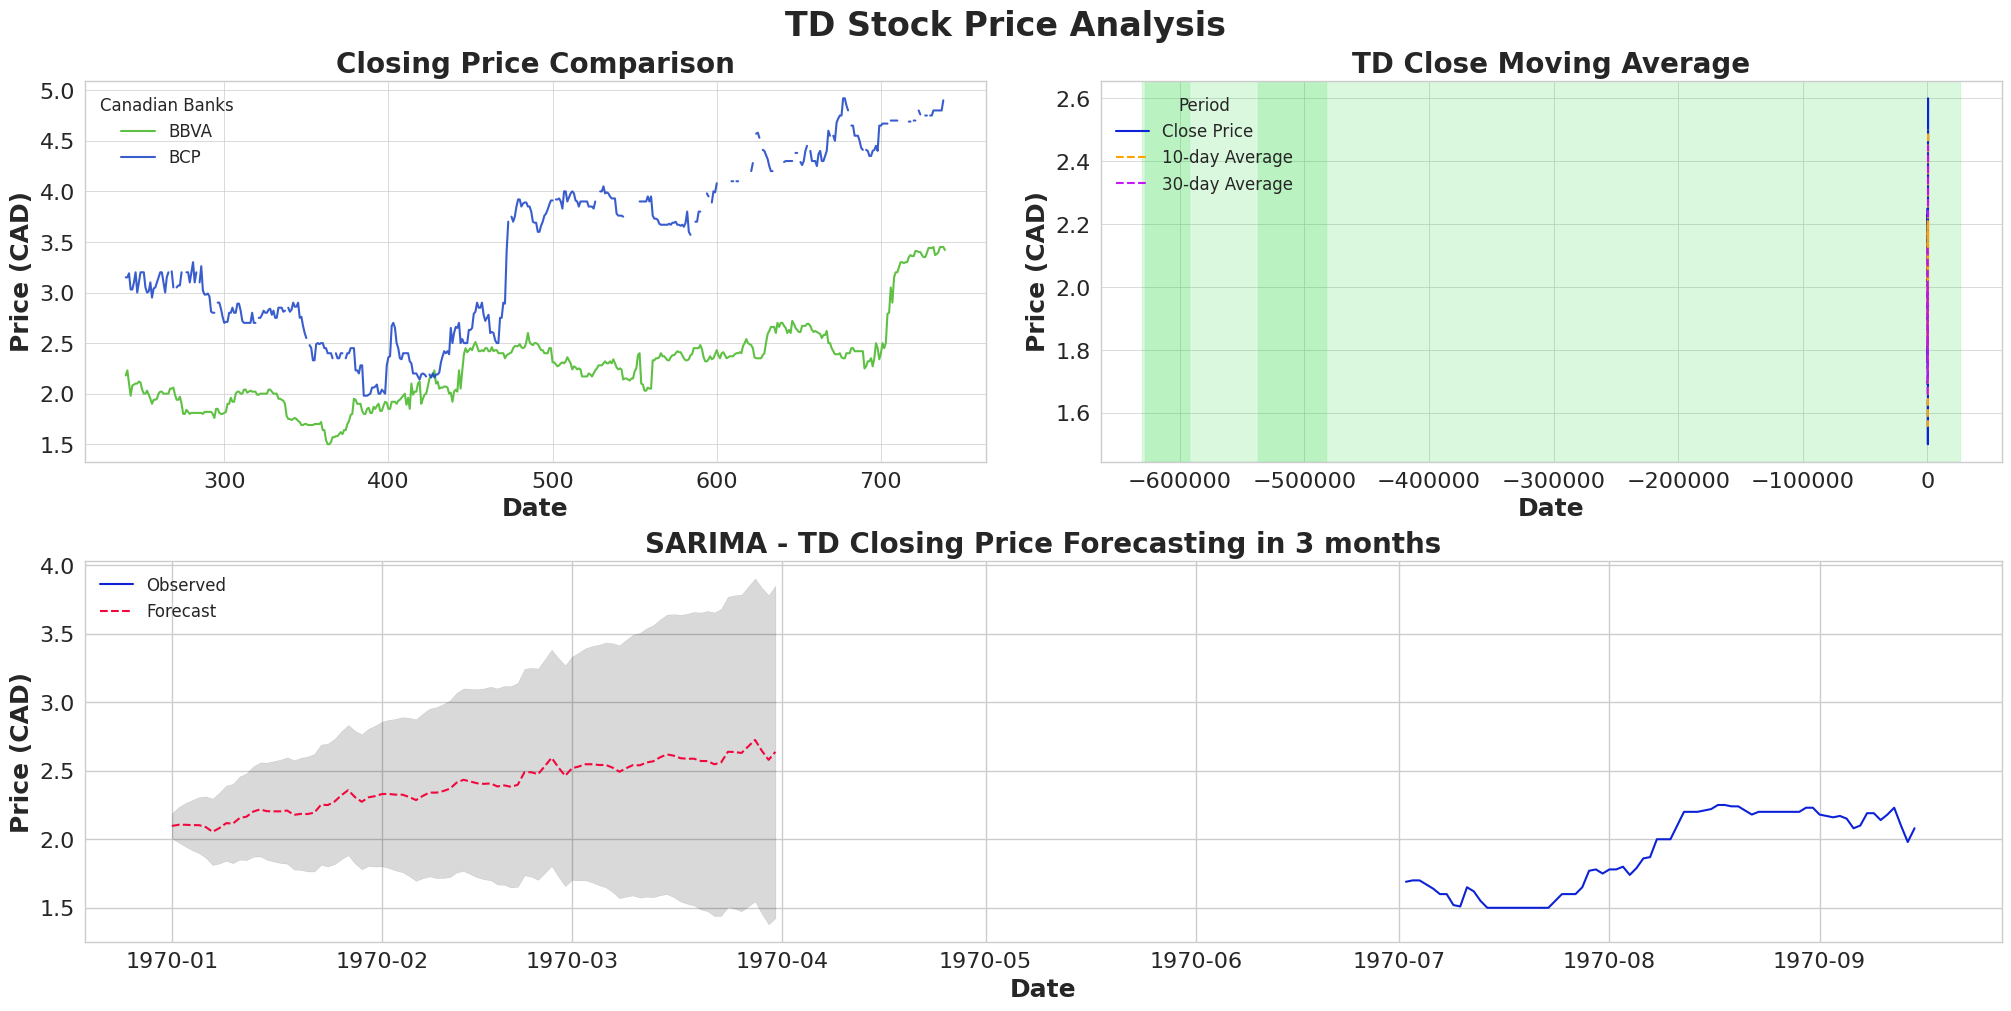

In [41]:
plt.style.use('seaborn-whitegrid')
fig1 = plt.figure(figsize=(20,10), constrained_layout=True)

axs = fig1.subplot_mosaic(
    """
    AB
    CC
    """
)

fig1.suptitle('TD Stock Price Analysis', weight="bold", size=24)
axs['A'].grid(True, linewidth=0.5)

axs['A'].plot(BBVA_date[240:740], BBVA_df['Cierre'][240:740], label='BBVA', c='#5FC144', alpha=1, linewidth=1.5)
axs['A'].plot(BCP_date[240:740], BCP_df['Cierre'][240:740], label='BCP', c='#1741C6', alpha=0.85, linewidth=1.5)


axs['A'].set_xlabel('Date', weight="bold", size=18)
axs['A'].set_ylabel('Price (CAD)', weight="bold", size=18)
axs['A'].set_title('Closing Price Comparison', weight="bold", size=20)
axs['A'].legend(fontsize="large", title="Canadian Banks", title_fontsize=12)
for label in (axs['A'].get_xticklabels() + axs['A'].get_yticklabels()):
    label.set_fontsize(16)

axs['B'].grid(True, linewidth=0.5)

axs['B'].plot(BBVA_date[220:520], df['Cierre'][220:520], label='Close Price', color='#0D22D6', alpha=1, linewidth=1.5)
axs['B'].plot(BBVA_date[220:520], df['MovingAvg_10Day'][220:520], label='10-day Average', linestyle='--', color='orange', alpha=1.0, linewidth=1.5)
axs['B'].plot(BBVA_date[220:520], df['MovingAvg_30Day'][220:520], label='30-day Average', linestyle='--', color='#C50AFC', alpha=0.95, linewidth=1.5)

axs['B'].set_xlabel('Date', weight="bold", size=18)
axs['B'].set_ylabel('Price (CAD)', weight="bold", size=18)
axs['B'].set_title('TD Close Moving Average', weight="bold", size=20)
axs['B'].legend(fontsize="large", title="Period", title_fontsize=12, loc='upper left')
axs['B'].axvspan(*mdates.datestr2num(['043','243']), color='#0DD622', alpha=0.15)
axs['B'].axvspan(*mdates.datestr2num(['250','350']), color='#0DD622', alpha=0.15)
axs['B'].axvspan(*mdates.datestr2num(['500','650']), color='#0DD622', alpha=0.15)

for label in (axs['B'].get_xticklabels() + axs['B'].get_yticklabels()):
    label.set_fontsize(16)

axs['C'].plot(BBVA_df_subset_s.index[125:], BBVA_df_subset_s.Cierre[125:], label='Observed', color='#0D22D6', alpha=1, linewidth=1.5)
axs['C'].plot(fitted_series, linestyle='--', label='Forecast', color='#F0083D', linewidth=1.5)
axs['C'].fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)
for label in (axs['C'].get_xticklabels() + axs['C'].get_yticklabels()):
    label.set_fontsize(16)

axs['C'].set_xlabel('Date', weight="bold", size=18)
axs['C'].set_ylabel('Price (CAD)', weight="bold", size=18)
axs['C'].legend(loc='upper left',fontsize='large')
axs['C'].set_title("SARIMA - TD Closing Price Forecasting in 3 months", weight="bold", size=20 )


plt.savefig('stock_analysis.png')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=82cbcb36-8542-4dfb-89ca-538b0d77b086' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>